# HW1. Vertebral Column Data Set
by Handan Cetin (USCID: 6074572947)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.neighbors as skN
import sklearn.metrics as skM


import warnings
warnings.filterwarnings('ignore') # for plots

### (a) Download the Vertebral Column Data Set

This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. 

(Accessed on September 6th, 2023, at: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column)

Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): 
1. pelvic incidence, 
2. pelvic tilt, 
3. lumbar lordosis angle, 
4. sacral slope, 
5. pelvic radius, and 
6. grade of spondylolisthesis. 

The following convention is used for the class labels: 
* DH (Disk Hernia), 
* Spondylolisthesis (SL), 
* Normal (NO), and 
* Abnormal (AB).

In this exercise, we only focus on a binary classification task NO=0 and AB=1.1

In [2]:
filepath = 'vertebral_column_data/column_2C.dat'
colnames = ['pelvic incidence', 
             'pelvic tilt', 
             'lumbar lordosis angle', 
             'sacral slope', 
             'pelvic radius', 
             'grade of spondylolisthesis', 
             'class label']

# Read the data
df = pd.read_csv(filepath, delimiter =' ', names = colnames)

# Filter/rename the data to only keep NO=0 and AB=1
df['class label'].replace(['NO', 'AB'], [0, 1], inplace = True)
df['class label'] = df['class label'].astype("category")
df

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


### (b) Pre-Processing and Exploratory data analysis

#### (b)i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

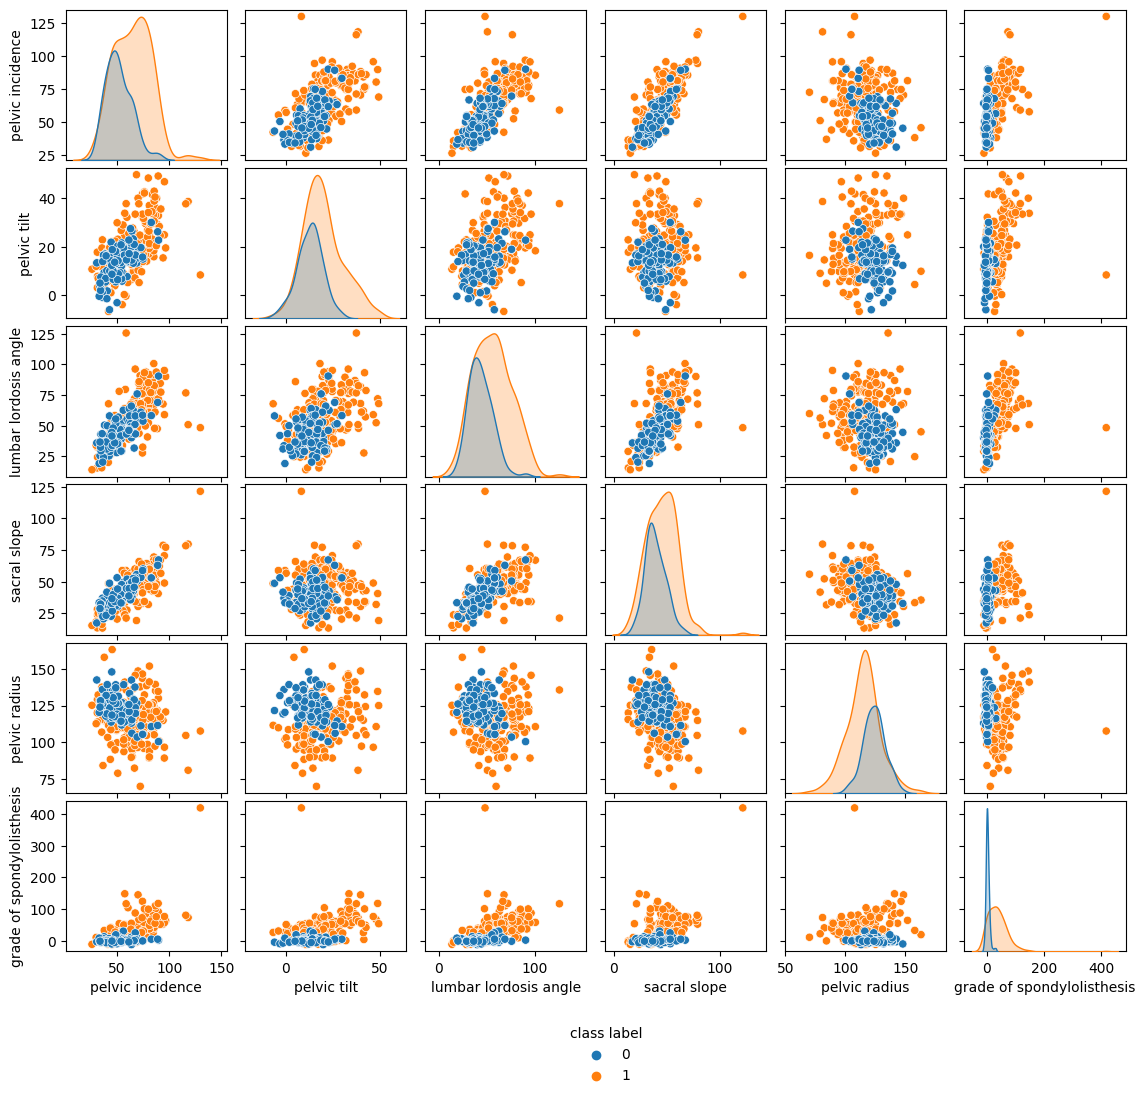

In [3]:
p = sns.pairplot(df, kind='scatter', hue = 'class label', grid_kws={"despine": False})
p.fig.set_size_inches(12,10)
sns.move_legend(p, "lower center", bbox_to_anchor=(0.5, -0.1))

#### (b)ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

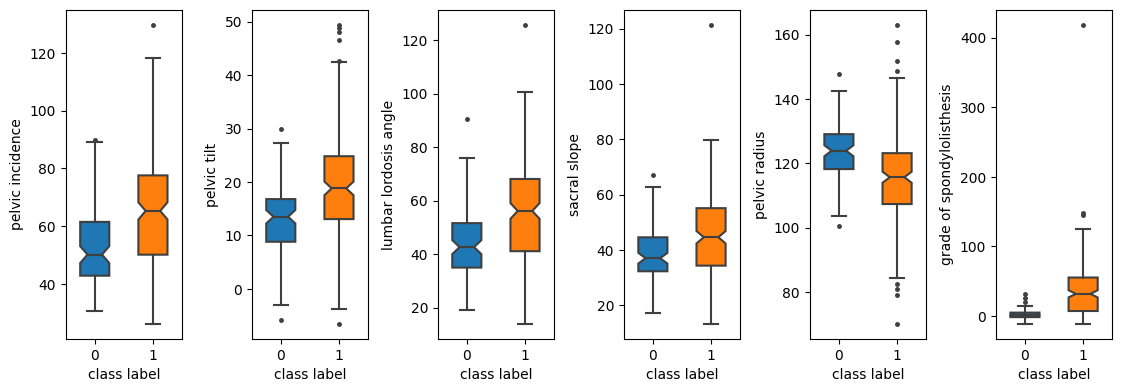

In [4]:
features = df.columns.drop('class label')
fig, axes = plt.subplots(1, len(features))
fig.set_size_inches(11.3,4) #aligning widths with the above figure
for features, ax in zip(features, axes.flatten()):
    sns.boxplot(y=features, x = 'class label', data=df, orient='v', ax=ax, saturation=1, width=0.5, notch = True, flierprops = dict(marker = "."))
plt.tight_layout(pad=1)
plt.show()

#### (b)iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [5]:
trainingSet = pd.concat([df[df['class label'] == 0].iloc[0:70, :], 
                         df[df['class label'] == 1].iloc[0:140, :]])

testingSet  = pd.concat([df[df['class label'] == 0].iloc[70:, :], 
                         df[df['class label'] == 1].iloc[140:, :]])

print('Dataset seperated into training and test sets. Sets have', len(trainingSet), 'and', len(testingSet), 'observations, respectively.')

Dataset seperated into training and test sets. Sets have 210 and 100 observations, respectively.


### (c) Classification using KNN on Vertebral Column Data Set

#### (c)i. Write code for k-nearest neighbors with Euclidean metric (or use a software package)

In [6]:
classifier = skN.KNeighborsClassifier(metric = 'euclidean')

# Define X and Y, features and target values
trainingFeatures = trainingSet.drop('class label', axis = 1)
trainingTarget   = trainingSet['class label']
testFeatures = testingSet.drop('class label', axis = 1)
testTarget   = testingSet['class label']

print('sklearn will be used to perform KNN classification.')

sklearn will be used to perform KNN classification.


#### (c)ii. Test all the data in the test database with k nearest neighbors.

Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k^ is the most suitable k among those values?


In [7]:
testingErrors  = []
trainingErrors = []
maxScore = 0 

for k in range(208, 0, -3):

    # Training step
    classifier = skN.KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', weights = 'uniform')
    classifier.fit(trainingFeatures, trainingTarget)
    
    # Prediction step
    testPredicted     = classifier.predict(testFeatures)
    trainingPredicted = classifier.predict(trainingFeatures) 
    
    # Calculate scores (The best performance is 1)
    testScore     = skM.accuracy_score(testTarget, testPredicted, sample_weight = None)
    trainingScore = skM.accuracy_score(trainingTarget, trainingPredicted, sample_weight = None)
    
    # Keep track for the best k value with maximum score (a.k.a. minimum error)
    if testScore > maxScore:
        maxScore = testScore
        bestK = k

    # Create error vectors for plotting
    testingErrors.append(1 - testScore)
    trainingErrors.append(1 - trainingScore)

k = bestK
print('Minimum error is reached at k =', bestK,'and k is set to this value for future analysis.')

Minimum error is reached at k = 4 and k is set to this value for future analysis.


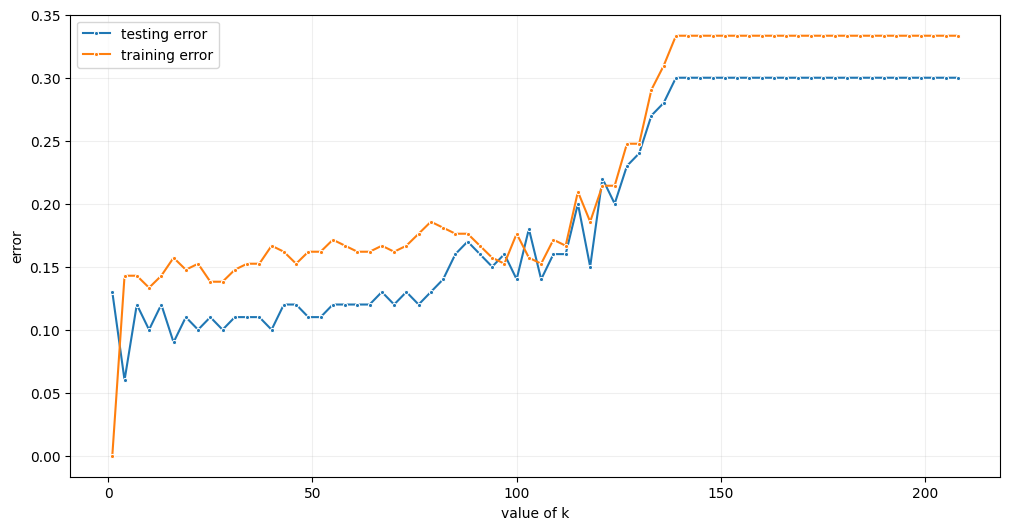

In [8]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = range(208, 0, -3), y = testingErrors, marker='.', label="testing error")
sns.lineplot(x = range(208, 0, -3), y = trainingErrors,marker='.', label="training error")
plt.gca().set_xlabel("value of k")
plt.gca().set_ylabel("error")
plt.grid(alpha = 0.2)
plt.show()



Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k^∗

In [9]:
# Fit the model at the best k value
classifier = skN.KNeighborsClassifier(n_neighbors = bestK, metric = 'euclidean', weights = 'uniform')
classifier.fit(trainingFeatures, trainingTarget)
testPredicted = classifier.predict(testFeatures)

# Calculate the confusion matrix
# the count of true negatives is C00, false negatives is C10, 
# true positives is C11 and false positives is C01.
confusionMatrix = skM.confusion_matrix(testTarget, testPredicted)
tn = confusionMatrix[0][0]
fn = confusionMatrix[1][0]
tp = confusionMatrix[1][1]
fp = confusionMatrix[0][1]

# Same results can be obtained from:
# skM.precision_recall_fscore_support(testTarget, testPredicted)
# f1Score = skM.f1_score(testTarget, testPredicted)
tpRate    = tp / (tp + fn)
tnRate    = tn / (fp + tn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1Score   = 2 * (precision * recall) / (precision + recall)

# Arrangement for printing table
matrix = [["Confusion Matrix:",  ((tn, fp), (fn, fp))],
          ["", ""],
          ["True positive rate:", "{:.4f}".format(tpRate)],
          ["True negative rate:", "{:.4f}".format(tnRate)],
          ["", ""],
          ["Precision:", "{:.4f}".format(precision)],
          ["Recall:", "{:.4f}".format(recall)],
          ["F1-score:", "{:.4f}".format(f1Score)]]
s = [[str(e) for e in row] for row in matrix]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print('\n'.join(table))

Confusion Matrix:  	((25, 5), (1, 5))
                   	                 
True positive rate:	0.9857           
True negative rate:	0.8333           
                   	                 
Precision:         	0.9324           
Recall:            	0.9857           
F1-score:          	0.9583           


#### (c)iii. Plot the best test error rate which is obtained by some value of k
Since the computation time depends on the size of the training set, one may
only use a subset of the training set. 

Plot the best test error rate which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}.

Note: for each N, select your training set by choosing the first floor(N/3) rows of Class 0 and the first N N-floor(N/3) rows of Class 1 in the training set you created in 1(b)iii. 

Also, for each N , select the optimal k from a set starting from k = 1, increasing by 5.

For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}.
This plot is called a Learning Curve


In [10]:
kList = []
errorList = []
for n in range(10, 211, 5):
    
    # Get the subset of the training set 
    subsetTrainingSet = pd.concat([trainingSet[trainingSet["class label"] == 0].iloc[0:n//3, :], 
                                   trainingSet[trainingSet["class label"] == 1].iloc[0:n-(n//3), :]])

    # Define X and Y, features and target values
    subsetTrainingFeatures = subsetTrainingSet.drop('class label', axis = 1)
    subsetTrainingTarget   = subsetTrainingSet['class label']
    
    # Training
    bestK = 0
    bestError = 2 # any value >1
    for k in range(1, n, 5):
        classifier = skN.KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        classifier.fit(subsetTrainingFeatures, subsetTrainingTarget)
        testPredicted = classifier.predict(testFeatures)

        # Keep track for the best k value with minimum error)
        predictionError = 1 - skM.accuracy_score(testTarget, testPredicted)
        if (predictionError < bestError):
            bestError = predictionError
            bestK = k
            
    # Create vectors for plotting
    kList.append(bestK)
    errorList.append(bestError)

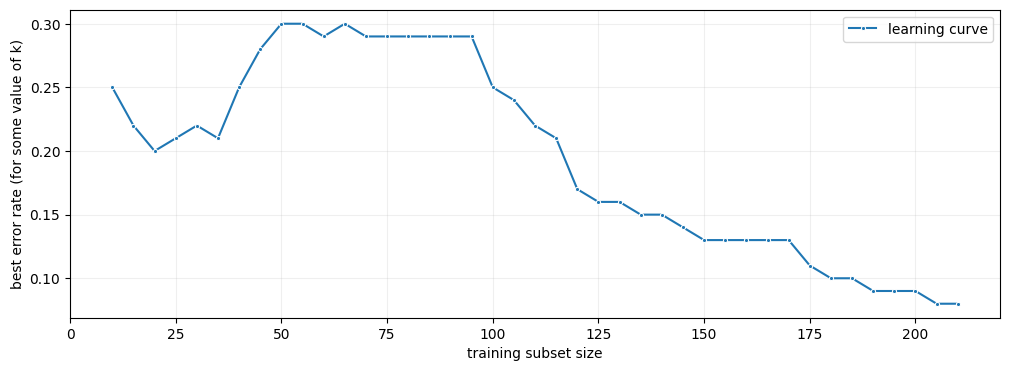

In [11]:
# Plot of the Learning Curve
plt.figure(figsize = (12, 4))
sns.lineplot(x = range(10, 211, 5), y = errorList, marker='.', label = 'learning curve')
plt.gca().set_xlabel("training subset size")
plt.gca().set_ylabel("best error rate (for some value of k)")
plt.grid(alpha = 0.2)
plt.show()


### (d) Replace the Euclidean metric with the following metrics
Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}

#### (d)i. Minkowski Distance

In [12]:
kRange = range(1, 200, 5)
testingErrorsMnk  = [] 
testingErrorsMan  = [] 
testingErrorsChw  = [] 
testingErrorsMah  = [] 
maxScore = 0 

for p in np.linspace(1,0,11):
    if p == 1:
        for k in kRange:

            # Manhattan distance: 'minkowski' with p = 1
            classifier = skN.KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = p)
            classifier.fit(trainingFeatures, trainingTarget)
            testPredicted     = classifier.predict(testFeatures)
            trainingPredicted = classifier.predict(trainingFeatures) 
            testScore     = skM.accuracy_score(testTarget, testPredicted, sample_weight = None)
            if testScore > maxScore:
                maxScore = testScore
                bestK = k
            testingErrorsMan.append(1 - testScore) 

            # Chebyshev distance: 'minkowski' with p = Inf
            classifier = skN.KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev', p = p)
            classifier.fit(trainingFeatures, trainingTarget)
            testPredicted     = classifier.predict(testFeatures)
            trainingPredicted = classifier.predict(trainingFeatures) 
            testScore = skM.accuracy_score(testTarget, testPredicted, sample_weight = None)
            testingErrorsChw.append(1 - testScore) 

            # mahalanobis distance: requires extra input
            # Issue: https://github.com/scikit-learn/scikit-learn/issues/10395
            # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html
            classifier = skN.KNeighborsClassifier(n_neighbors = k, metric = 'mahalanobis', metric_params = {"VI": np.linalg.pinv(np.cov(trainingFeatures, rowvar=False))})
            classifier.fit(trainingFeatures, trainingTarget)
            testPredicted     = classifier.predict(testFeatures)
            trainingPredicted = classifier.predict(trainingFeatures) 
            testScore     = skM.accuracy_score(testTarget, testPredicted, sample_weight = None)
            testingErrorsMah.append(1 - testScore) 

        # Set the k value for p-iteration
        k = bestK
        print('k is set to', bestK,'after training with minkowski distance at p =', p)

    # minkowski distance: different p vals
    classifier = skN.KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = pow(10, p))
    classifier.fit(trainingFeatures, trainingTarget)

    testPredicted = classifier.predict(testFeatures)
    testScore     = skM.accuracy_score(testTarget, testPredicted, sample_weight = None)
    testingErrorsMnk.append(1 - testScore) 

k is set to 6 after training with minkowski distance at p = 1.0


##### (d)ii.A. ...which becomes Manhattan Distance with  p = 1

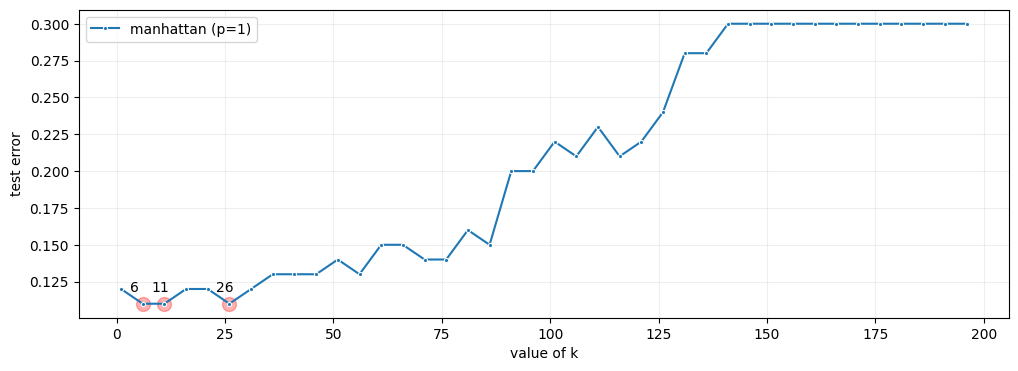

In [14]:
bestKforMan = np.array(kRange)[np.where(testingErrorsMan == min(testingErrorsMan))]

plt.figure(figsize = (12, 4))
sns.lineplot(x = kRange, y = testingErrorsMan, marker='.', label = 'manhattan (p=1)')
if len(bestKforMan) > 1:
    for k in bestKforMan:
        plt.scatter(k, min(testingErrorsMan), marker='.', s = 400, c='r', alpha=0.3)
        plt.text(k-len(bestKforMan), min(testingErrorsMan)+0.008, str(k))
else:
    plt.scatter(bestKforMan, min(testingErrorsMan), marker='.', s = 400, c='r', alpha=0.3)
    plt.text(bestKforMan-2, min(testingErrorsMan)+0.03, 'best')
    plt.text(bestKforMan-4, min(testingErrorsMan)+0.015, 'k = ' +str(int(bestKforMan)))
plt.gca().set_xlabel("value of k")
plt.gca().set_ylabel("test error")
plt.grid(alpha = 0.2)
plt.show()

##### (d)ii.B. ...with log(p) ∈ {0.1, 0.2, 0.3, ..., 1} (use the k∗ in 1(d)iA). What is the best log10(p)?

In [15]:
# Prediction is done in the previous cell
summarizedPErrors = pd.DataFrame({ "p": pow(10, np.linspace(1,0,11)),
                                  "log10(p)": np.linspace(1,0,11),
                                  "Test Error": testingErrorsMnk })
summarizedPErrors

,p,log10(p),Test Error
0,10.000000,1.0,0.09
1,7.943282,0.9,0.09
2,6.309573,0.8,0.08
3,5.011872,0.7,0.07
4,3.981072,0.6,0.06
5,3.162278,0.5,0.08
6,2.511886,0.4,0.08
7,1.995262,0.3,0.08
8,1.584893,0.2,0.09
9,1.258925,0.1,0.09


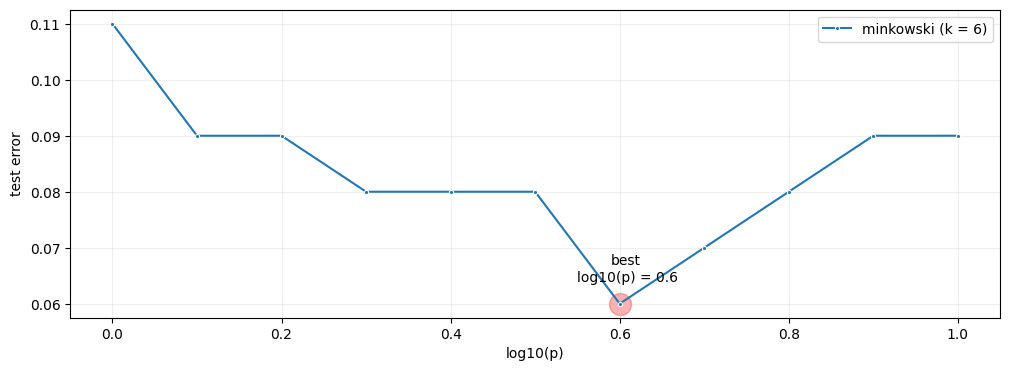

Best log10(p) value is found as 0.6 when k is set to 6


In [16]:
minErr = summarizedPErrors["Test Error"].min()
minErrP = summarizedPErrors[summarizedPErrors["Test Error"] == minErr].iloc[0]["log10(p)"]
plt.figure(figsize = (12, 4))
sns.lineplot(x = np.linspace(1,0,11), y = testingErrorsMnk, marker='.', label = 'minkowski (k = '+str(bestKforMan[0])+')')
plt.scatter(minErrP, minErr, marker='.', s = 1000, c='r', alpha=0.3)
plt.text(minErrP-0.01, minErr+0.007, 'best')
plt.text(minErrP-0.05, minErr+0.004, 'log10(p) = ' + str(minErrP))
plt.gca().set_xlabel("log10(p)")
plt.gca().set_ylabel("test error")
plt.grid(alpha = 0.2)
plt.show()

print('Best log10(p) value is found as', minErrP,'when k is set to', bestKforMan[0])

##### (d)ii.C. ...which becomes Chebyshev Distance with p → ∞


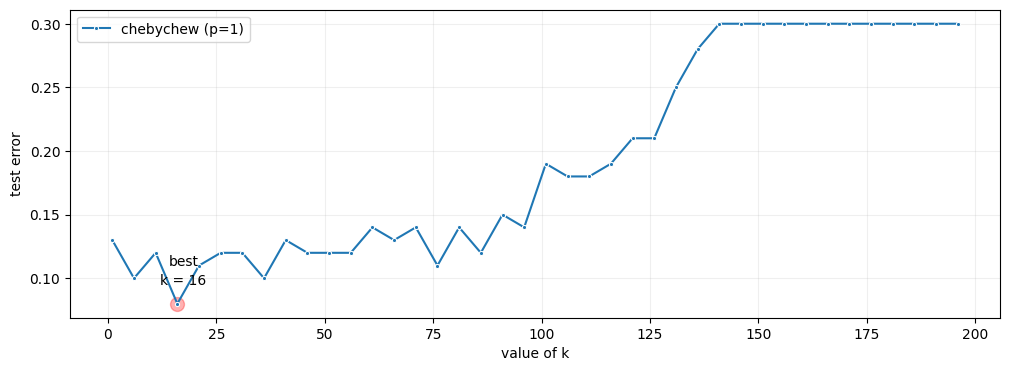

In [17]:
bestKforChw = np.array(kRange)[np.where(testingErrorsChw == min(testingErrorsChw))]
plt.figure(figsize = (12, 4))
sns.lineplot(x = kRange, y = testingErrorsChw, marker='.', label = 'chebychew (p=1)')
if len(bestKforChw) > 1:
    for k in bestKforChw:
        plt.scatter(k, min(testingErrorsChw), marker='.', s = 400, c='r', alpha=0.3)
        plt.text(k-len(bestKforChw), min(testingErrorsChw)+0.008, str(k))
else:
    plt.scatter(bestKforChw, min(testingErrorsChw), marker='.', s = 400, c='r', alpha=0.3)
    plt.text(bestKforChw-2, min(testingErrorsChw)+0.03, 'best')
    plt.text(bestKforChw-4, min(testingErrorsChw)+0.015, 'k = ' +str(int(bestKforChw)))
plt.gca().set_xlabel("value of k")
plt.gca().set_ylabel("test error")
plt.grid(alpha = 0.2)
plt.show()

#### (d)ii. Mahalanobis Distance

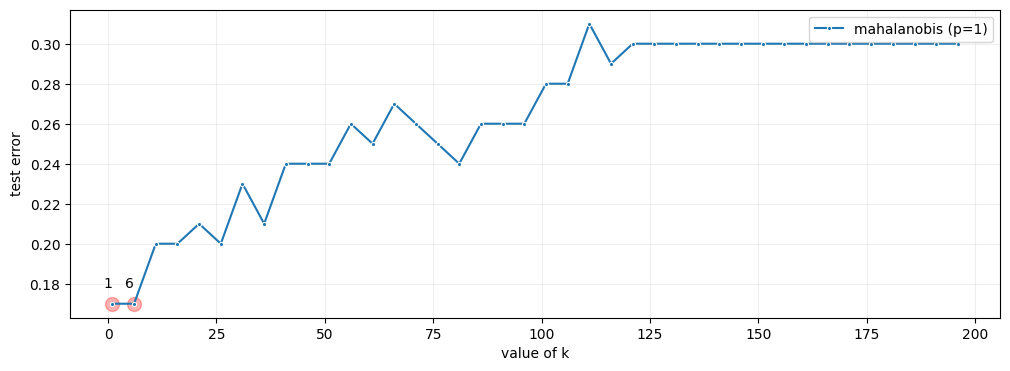

In [18]:
bestKforMah = np.array(kRange)[np.where(testingErrorsMah == min(testingErrorsMah))]
plt.figure(figsize = (12, 4))
sns.lineplot(x = kRange, y = testingErrorsMah, marker='.', label = 'mahalanobis (p=1)')
if len(bestKforMah) > 1:
    for k in bestKforMah:
        plt.scatter(k, min(testingErrorsMah), marker='.', s = 400, c='r', alpha=0.3)
        plt.text(k-2, min(testingErrorsMah)+0.008, str(k))
else:
    plt.scatter(bestKforMah, min(testingErrorsMah), marker='.', s = 400, c='r', alpha=0.3)
    plt.text(bestKforMah-2, min(testingErrorsMah)+0.03, 'best')
    plt.text(bestKforMah-4, min(testingErrorsMah)+0.015, 'k = ' +str(int(bestKforMah)))
plt.gca().set_xlabel("value of k")
plt.gca().set_ylabel("test error")
plt.grid(alpha = 0.2)
plt.show()

In [26]:
bestKforEuc = np.array(range(208, 0, -3))[np.where(testingErrors == min(testingErrors))]

# Prediction is done in the previous cell
summarizedTable = pd.DataFrame({ "metric": ["euclidean", "manhattan",  "chebyshev", "mahalanobis"], 
                                 "best k": [(bestKforEuc), (bestKforMan),  (bestKforChw), (bestKforMah)], 
                                 "minimum test error": [min(testingErrors), min(testingErrorsMan), min(testingErrorsChw), min(testingErrorsMah)], })
summarizedTable

# NOTE: range for k was different for euclidean

,metric,best k,minimum test error
0,euclidean,[4],0.06
1,manhattan,"[6, 11, 26]",0.11
2,chebyshev,[16],0.08
3,mahalanobis,"[1, 6]",0.17


### (e) The majority polling decision can be replaced by weighted decision, 
in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. 

Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, ... , 196}.


In [ ]:
kRange = range(1, 200, 5)
testingErrorsDistMnk  = [] 
testingErrorsDistMan  = [] 
testingErrorsDistChw  = [] 
testingErrorsDistMah  = [] 
maxScore = 0 

for m in summarizedTable.metric[0:3]:

    for k in kRange:

        # Manhattan distance: 'minkowski' with p = 1
        classifier = skN.KNeighborsClassifier(n_neighbors = k, metric = m, p = 1, weights = 'distance')
        classifier.fit(trainingFeatures, trainingTarget)
        testPredicted     = classifier.predict(testFeatures)
        trainingPredicted = classifier.predict(trainingFeatures) 
        testScore     = skM.accuracy_score(testTarget, testPredicted, sample_weight = None)
        if testScore > maxScore:
            maxScore = testScore
            bestK = k
        testingErrorsMan.append(1 - testScore) 

In [35]:
for m in summarizedTable.metric[0:3]:
    print(m)


euclidean
manhattan
chebyshev


### (f) What is the lowest training error rate you achieved in this homework?
